<a href="https://colab.research.google.com/github/bhanavigoyal/Mini-Project--HandWritten-0-1/blob/main/Handwritten_Digital_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Neural Networks for Handwritten Digital Recognition, Binary

<h2>1 - Packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

<h2>2 - Neural Networks

<h3>2.1 - Problem Statement<h3>

A neural network is used to recognize two handwritten digits, zero and one. This is a binary classification task.


In [2]:
#load subset of data containing only o and 1 into the varialbes.
X,y = load_data()

In [3]:
print('the first element of X is: ',X[0])

the first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [4]:
print('The first element of y is: ', y[0,0])
print('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


In [5]:
#shape of x and y
print("The shape of X is "+ str(X.shape)) # in the output: 1st arg- no of images, 2nd and 3rd arg-width and height
print("The shape of y is "+ str(y.shape))

The shape of X is (1000, 400)
The shape of y is (1000, 1)


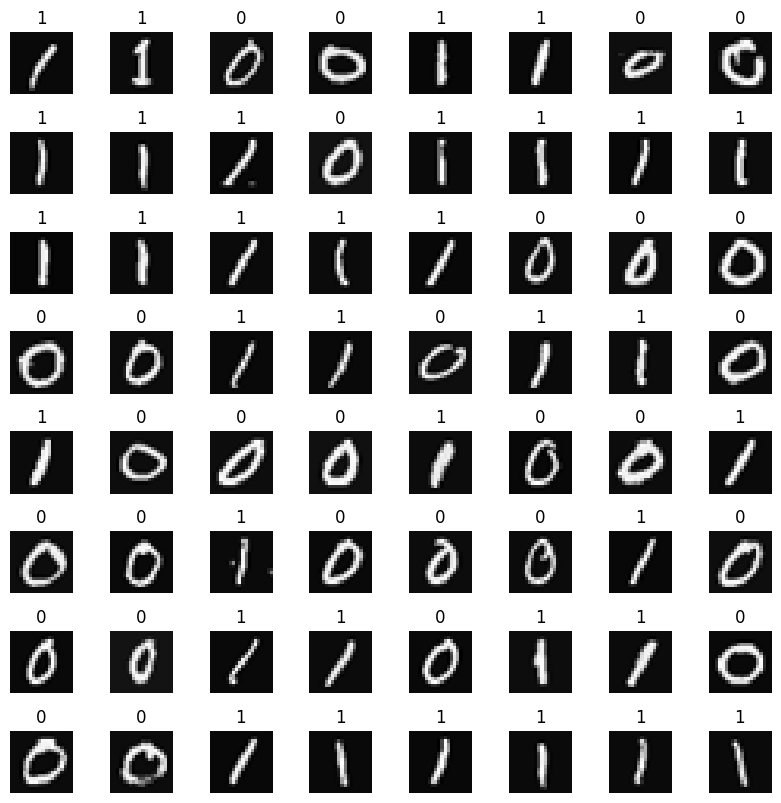

In [16]:
#visualising Data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
  #Select random indices
  random_index = np.random.randint(m)

  #Select rows corresponding to the random indices and reshape the image
  X_random_reshaped = X[random_index].reshape(20,20).T

  #Display the image
  ax.imshow(X_random_reshaped, cmap='gray')

  #Display label above the image
  ax.set_title(y[random_index,0])
  ax.set_axis_off()

using sequential model and dense layer with sigmoid activation for the model

In [17]:
model = Sequential(
    [
    tf.keras.Input(shape=(400,)),  #specify input size
    Dense(25, activation='sigmoid'),
    Dense(15, activation='sigmoid'),
    Dense(1, activation='sigmoid')
    ],name="my_model"
)

In [18]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [19]:
#unit test
from public_tests import *
test_c1(model)

All tests passed!


In [20]:
L1_num_params = 400*25 + 25 #W1 paramenters + b1 parameters
L2_num_params = 25*15 + 15
L3_num_params = 15*1 +1

print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ", L3 params = ", L3_num_params)

L1 params =  10025 , L2 params =  390 , L3 params =  16


In [21]:
[layer1, layer2, layer3] = model.layers

In [23]:
#Examine weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [24]:
print(model.layers[2].weights)

[<tf.Variable 'dense_5/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.43808672],
       [ 0.15838039],
       [-0.0908764 ],
       [-0.00780606],
       [ 0.06741655],
       [ 0.08333093],
       [-0.20511532],
       [-0.19300044],
       [-0.52607685],
       [-0.15863547],
       [ 0.52068096],
       [ 0.4987852 ],
       [ 0.15772659],
       [ 0.17600185],
       [ 0.59781617]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [25]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 5ms/step - loss: 0.6345
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5099
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3686
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2580
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1874
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1427
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1126
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0920
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0769
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0655
Epoch 11/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0567
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 13/20
32/32 [==============================

In [26]:
prediction=model.predict(X[0].reshape(1,400)) #a zero
print(f" predicting a zero: {prediction}")
prediction=model.predict(X[500].reshape(1,400)) #a one
print(f" predicting a one: {prediction}")

1/1 [==============================] - 0s 143ms/step
 predicting a zero: [[0.02113364]]
1/1 [==============================] - 0s 34ms/step
 predicting a one: [[0.9839928]]


In [27]:
if prediction>=0.5:
  yhat=1
else:
  yhat=0
print("prediction after threshold: ", yhat)

prediction after threshold:  1


1/1 [==============================] - 0s 24ms/step


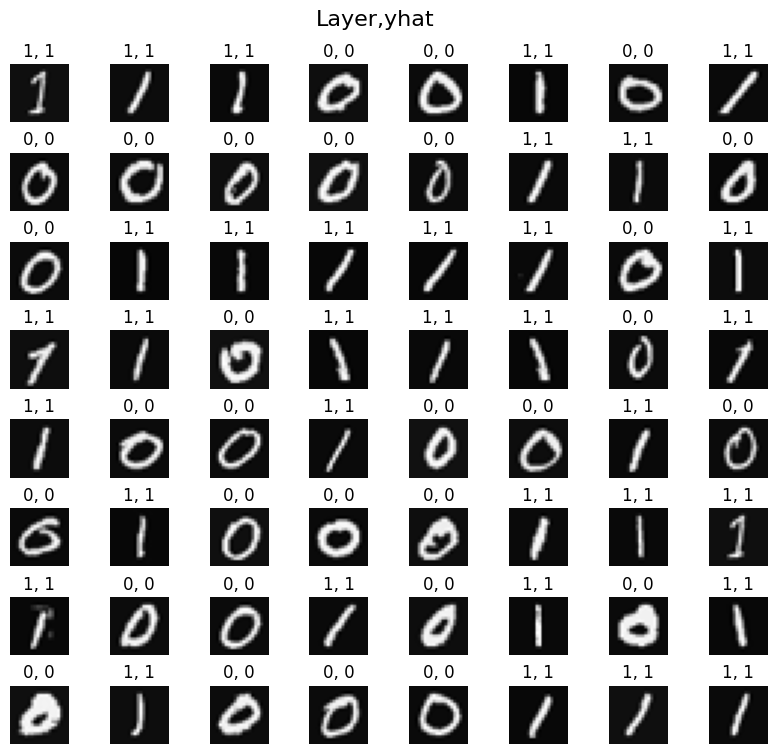

In [31]:
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

m,n = X.shape

fig,axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad=0.1, rect=[0,0.03,1,0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
  #select random indices
  random_index = np.random.randint(m)

  X_random_reshaped = X[random_index].reshape((20,20)).T

  ax.imshow(X_random_reshaped, cmap='gray')


  prediction = model.predict(X[random_index].reshape(1,400))
  if prediction>=0.5:
    yhat=1
  else:
    yhat=0

  ax.set_title(f"{y[random_index, 0]}, {yhat}")
  ax.set_axis_off()

fig.suptitle("Layer,yhat", fontsize=16)
plt.show()